# Unsupervised Learning

We will start with some simple exploratory data visualization.
Let's load the x-ray diffraction dataset again...

In [94]:
import numpy as np

with open("./data_Si/24297_NbMnVO_v02.txt", "r") as f:
    data = f.read()

intensities = []
Qax = []

lines = data.split("\n")

for line in lines:
    if line.startswith("I"):
        intens = [float(l) for l in line.split('=')[1].split(',')]
        intensities.append(intens)
    elif line.startswith("Q"):
        Qax = [float(l) for l in line.split('=')[1].split(',')]

y = np.array(intensities).T
x = np.array(Qax)

In [8]:
y.shape


(2082, 317)

ok this was a quite complex dataset and we can make sort of a waterfall plot that exemplifies the complexity like this (looks like a joy division t-shirt dsoen't it?):

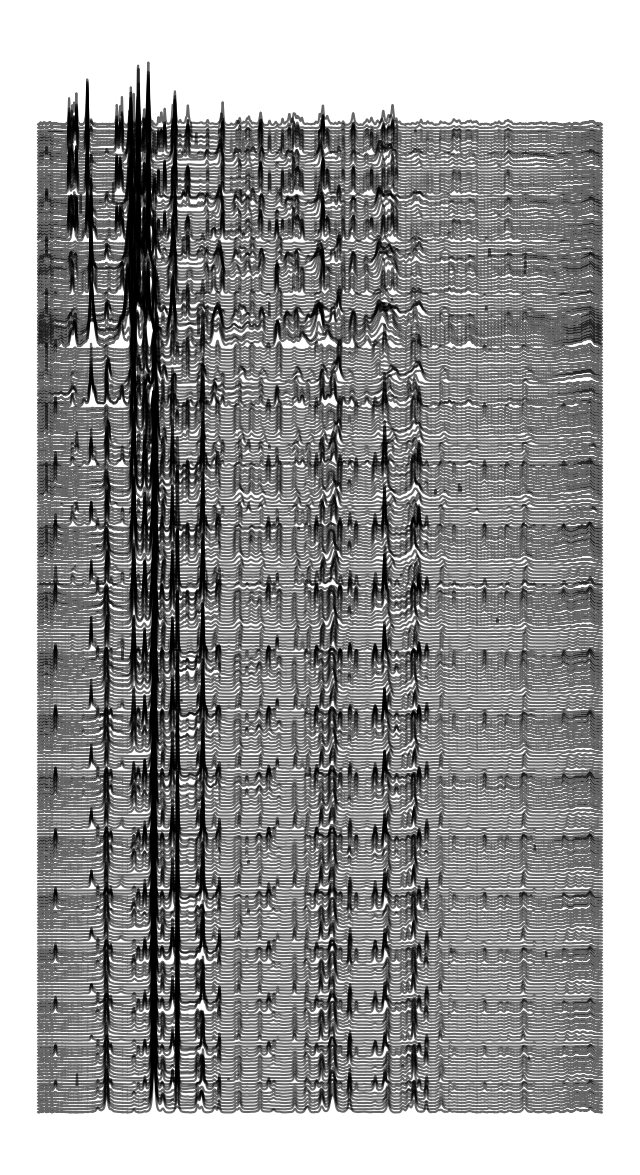

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,15))
for i,y_ in enumerate(y.T):
    plt.plot(x,y_/np.max(y_)+i/20,color='black',alpha=0.6)
plt.axis('off')
plt.show()

A lot of these XRD patterns look alike and some look very different. One way to measure the similarity or dissimilarity is to treat the data as a vector where each entry describes a dimension. If so we can pretend to measure the distance between two patterns ... or vectors ... by their euclidean distance. The euclidean distance is defined through:
$$d(\mathbf{p}, \mathbf{q}) = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$$

or 

$$
d(\mathbf{x},\mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

we can change the exponent to a higher number to get the so called lp-norms. Now to measure the distance between all points we can easily create a pair correlation matrix.

A pair distribution function or pair correlation function is a way of describing the distribution of distances between particles in a system. The pair distribution matrix is a matrix that represents the probability density of finding two particles at a distance r from each other. The matrix can be represented in a radial distribution function (RDF) plot, which is a histogram of the number of particle pairs as a function of the distance between them.

To calculate the pair distribution matrix in Python, we can use the pdist function from the scipy library. This function calculates the pairwise distances between all points in a given set of data.

Here is an example code snippet to calculate the pair distribution matrix for our XRD dataset:

In [33]:
from scipy.spatial.distance import pdist,squareform
from matplotlib import colors
# Calculate the pairwise distances between all particles
distances = squareform(pdist(y.T))

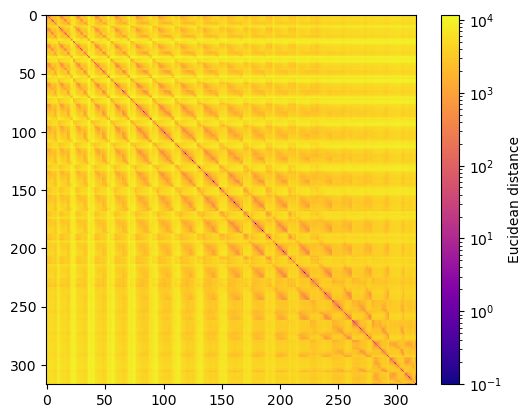

In [34]:
vmax = np.max(distances)
plt.imshow(distances, cmap='plasma', norm=colors.LogNorm(vmin=0.1, vmax=vmax))
plt.colorbar(label='Eucidean distance')

uclidean vs. Cosine Metrics for Measuring Dissimilarity

When working with high-dimensional data, it is often necessary to measure the dissimilarity between pairs of objects. Two common metrics for measuring dissimilarity are the Euclidean distance and the cosine distance. While they are both distance metrics, they have different properties that make them suitable for different types of data.

The Euclidean distance measures the straight-line distance between two points in a high-dimensional space. It is defined as:


$$
d(\mathbf{x},\mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

where $x$ and $y$ are two $n$-dimensional vectors. The Euclidean distance is sensitive to the magnitude of the vectors, which means that if two vectors have the same direction but different magnitudes, they will be considered dissimilar. Therefore, the Euclidean distance is most suitable for data that has a natural notion of scale.

The cosine distance, on the other hand, measures the angle between two vectors in high-dimensional space. It is defined as:
$$cos(\theta) = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert}$$

The cosine distance is insensitive to the magnitude of the vectors, which means that it only considers the direction of the vectors. This makes it suitable for data that has no natural notion of scale ... this is super important for XRD data.

In Python, the scipy.spatial.distance module provides functions for computing both the Euclidean distance and the cosine distance. For example, the pdist function can be used to compute pairwise distances between a set of vectors, and the squareform function can be used to reshape the distances into a square matrix.

In [35]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise Euclidean distances
euclidean_distances = pdist(y.T, metric='euclidean')

# Compute pairwise cosine distances
cosine_distances = pdist(y.T, metric='cosine')

# Reshape distances into a square matrix
euclidean_matrix = squareform(euclidean_distances)
cosine_matrix = squareform(cosine_distances)

Let's have a look at the cosine distance matrix:

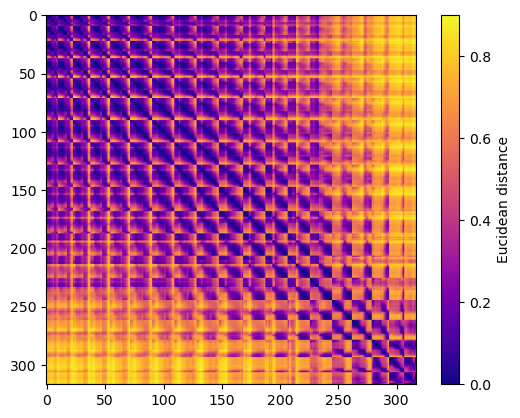

In [37]:
plt.imshow(cosine_matrix, cmap='plasma')
plt.colorbar(label='Eucidean distance')

Ok but what can we do with this now? Afterall we want to know what kind of structures might be present in our data right? But this is a problem describing complex relationships in 300+ dimensions? Nobody can think in 300 dimensions so we do a powerful trick:

We try to arrange points that have *roughly* the same distance in 2D than these points have in 300+D. How does this work? Well ... the magic of multidimensional scaling. Explained dby chatGPT like (pretty good imho):

Multidimensional Scaling (MDS) is a technique used in data analysis to reduce the dimensionality of a dataset while preserving pairwise distances between data points. It is commonly used in data visualization, as it can help to represent high-dimensional data in two or three dimensions, making it easier to interpret and visualize.

MDS works by taking a distance matrix as input, which contains the pairwise distances between all data points. The algorithm then attempts to find a set of points in a lower-dimensional space (e.g., a 2D or 3D space) that approximates the pairwise distances as closely as possible.

There are two main types of MDS: classical MDS and non-metric MDS. Classical MDS aims to preserve the exact pairwise distances between data points, while non-metric MDS only preserves the rank-order of the distances. Both techniques can be useful, depending on the nature of the data and the goals of the analysis.

This will create a so called embedding. 

In machine learning and natural language processing, an embedding is a representation of a feature space in a lower-dimensional space. It is a way to transform high-dimensional data into a lower-dimensional space that retains the most important information, while reducing noise and redundancy. Embeddings are commonly used for text data, where words are mapped to vectors in a low-dimensional space that capture their meaning and context. They can also be used for other types of data, such as images or audio, where features can be extracted and mapped to lower-dimensional representations. The resulting embeddings can then be used as input to machine learning algorithms for tasks such as classification or clustering.

In Python, MDS can be performed using the sklearn.manifold.MDS class. Here is an example code snippet:

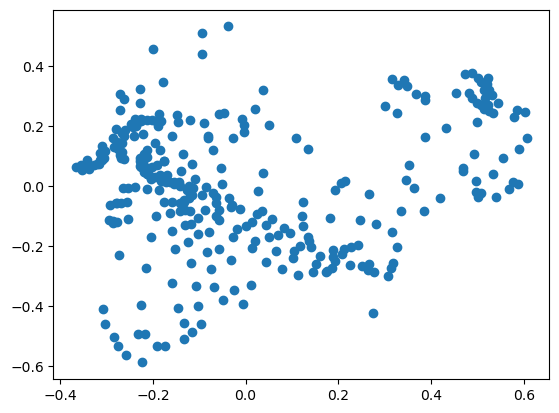

In [38]:
from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(cosine_matrix)

# Plot the embedding
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.show()

The real world example might be a little complicated to interpret. Essentially we are trying to find regions or clusters where in a cluster patterns are very similar and out of the lcuster things are very dissimilar

Maybe a more chemical example would be to try to do this for all molecules to get like the entire chemical space

In [53]:
import os
import pandas as pd
import urllib.request

url = 'https://raw.githubusercontent.com/flawnson/Melting_point_predictor_NN_Regression/master/BradleyMeltingPointDatasetClean.csv'

molecules = pd.read_csv(url,index_col=0,parse_dates=[0])

from rdkit import Chem
from rdkit.Chem import AllChem

# Create a list to hold the fingerprints
fingerprints = []
melting_points = []

# Iterate over the 'smiles' column in the dataframe
for smi,melt in zip(molecules['smiles'],molecules['mpC']):
    try:
        # Convert the SMILES string to a molecule object
        mol = Chem.MolFromSmiles(smi)
        # Generate the fingerprint for the molecule
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=64)
        # Append the fingerprint to the list
        fingerprints.append(fp)
        melting_points.append(melt)
    except:
        pass

[15:53:54] Explicit valence for atom # 20 C, 5, is greater than permitted
[15:53:54] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[15:53:54] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 23
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[15:53:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 8 9 10 11 12 13 14
[15:53:55] Can't kekulize mol.  Unkeku

Since we are looking at binary vectors we need to use a different metric:

In [57]:
ham_distances = pdist(fingerprints, metric='hamming')

# Reshape distances into a square matrix
ham_matrix = squareform(ham_distances)


(27976, 27976)


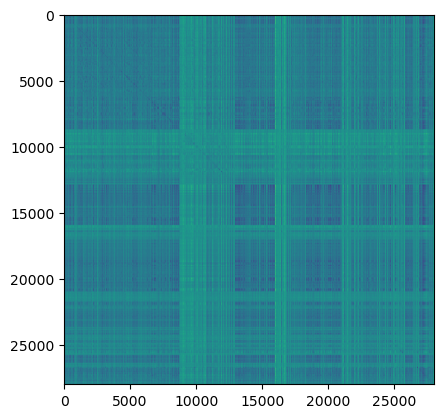

In [59]:
#this is too large for a MDS and will take too long so we only do 2000 molecules
print(cheb_matrix.shape)

plt.imshow(ham_matrix)

In [60]:
# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(ham_matrix[0:2000,0:2000])

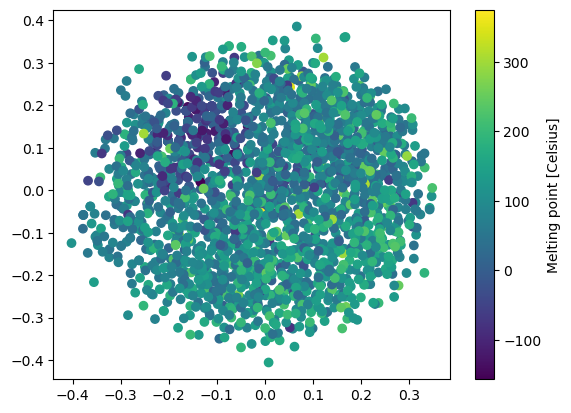

In [66]:
# Plot the embedding ... we see something strange right
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0], embedding[:, 1],c=melting_points[0:2000])
plt.colorbar(label='Melting point [Celsius]')
plt.show()

If you need to deal with very large data PCa can come in quite handy. Since the fingerprints are rather sparse it might now work as well.

chatGPT explains PCA as follows:

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in data analysis and machine learning. The goal of PCA is to transform the original data to a new coordinate system, where the variables are uncorrelated and ordered in terms of their contribution to the variance of the data. In other words, PCA identifies the most important variables that explain most of the variation in the data, and transforms the data into a lower dimensional space, where the variables are independent.

PCA works by finding a set of orthogonal axes (called principal components) in the high-dimensional space, which capture the largest possible variance in the data. The first principal component is the direction in which the data has the maximum variation, and the second principal component is the direction that explains the maximum variation, given that it is orthogonal to the first principal component. This process is repeated for all the remaining principal components, which can be seen as linear combinations of the original variables.

PCA can be applied to various types of data, including continuous and discrete variables, and can be used for various purposes such as data visualization, feature selection, noise reduction, and more.

In [72]:
from sklearn.decomposition import PCA

# create a PCA object
pca = PCA(n_components=10)

# fit and transform the data
X_pca = pca.fit_transform(fingerprints)

print(pca.explained_variance_ratio_)

[0.08676922 0.0532517 ]


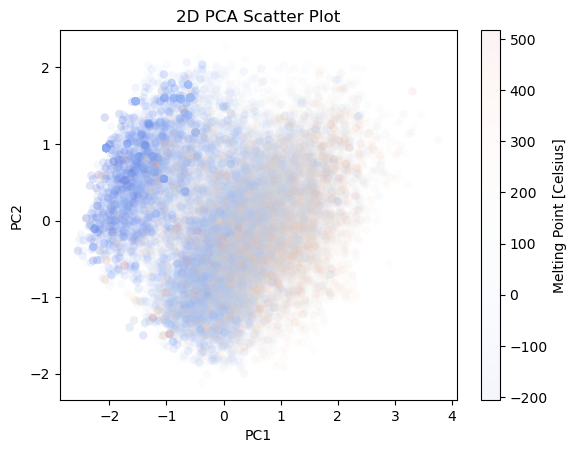

In [81]:
import matplotlib.pyplot as plt

# Project the data onto the first two principal components
X_2d = X_pca[:, :2]

# Plot the data points as a 2D scatter plot, with color based on melting point
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=melting_points,alpha=0.05,cmap='coolwarm',edgecolor='none')
plt.colorbar(label="Melting Point [Celsius]")

# Add axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Scatter Plot')
plt.show()

Looks to me like there is a good two clusters of molecules right? Let's visualize as a 2D histogram the density of points because it is not that greatly visibile ... while we are at it we can do a hexbin plot that also shows us the averade melting point in a second plot

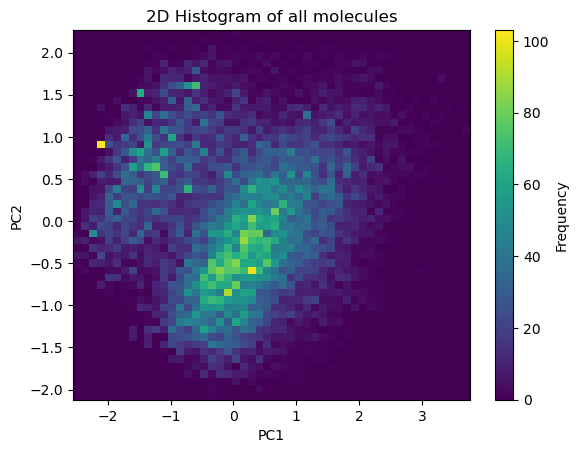

In [87]:
_ = plt.hist2d(X_2d[:, 0], X_2d[:, 1],50)
plt.colorbar(label='Frequency')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Histogram of all molecules')
plt.show()

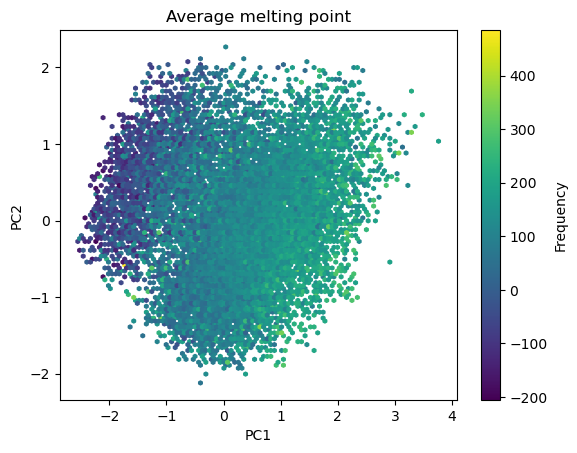

In [90]:
plt.hexbin(X_2d[:, 0], X_2d[:, 1], C=melting_points)
plt.colorbar(label='Frequency')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Average melting point')
plt.show()

# Clustering

In data clustering, the main objective is to group a set of objects or data points in such a way that objects in the same group are more similar to each other than to those in other groups. Clustering is an unsupervised learning technique, meaning there are no predefined labels for the data. The goal is to find the underlying structure or patterns in the data. Clustering algorithms can be divided into two types: hierarchical and partitional.

Hierarchical clustering creates a tree-like structure of the data, called a dendrogram. The algorithm starts by treating each data point as a cluster and then merges them into successively larger clusters based on their similarity until all points belong to a single cluster. This method can be divisive (top-down), where all points start in one cluster, and each step divides it into smaller clusters, or agglomerative (bottom-up), where each point starts in a separate cluster, and each step merges them into larger clusters.

Partitional clustering divides the data into a predetermined number of clusters without forming a hierarchy. This method requires the selection of the number of clusters before the algorithm is run. The goal is to minimize a cost function that measures the dissimilarity between the clusters.

There are various metrics for clustering, including the Euclidean distance, Manhattan distance, and cosine similarity. The choice of metric can have a significant impact on the resulting clusters.

Once the clusters have been identified, they can be used for tasks such as anomaly detection, image segmentation, and recommendation systems ... and of course for clustering different XRD patterns or molecules.

I will leave it for the small projects for you to try out clustering on these datasets and explain he different clustering algorithms using the super nice code from the scikit learn website 

# Decomposition

Sometimes the data we look at is really not THAT different from each other and we can simply decompose it into some basis
The Signal is then just the sum of the different decomposed things. Examples include XRD data but we can also do this with our UV Vis data!

Want an example with XRD data? Take the Mn-V-Nb-O data and try it out!

In [95]:
import numpy as np

with open("./data_Si/24297_NbMnVO_v02.txt", "r") as f:
    data = f.read()

intensities = []
Qax = []

lines = data.split("\n")

for line in lines:
    if line.startswith("I"):
        intens = [float(l) for l in line.split('=')[1].split(',')]
        intensities.append(intens)
    elif line.startswith("Q"):
        Qax = [float(l) for l in line.split('=')[1].split(',')]

y = np.array(intensities).T
x = np.array(Qax)

Decomposition then works like this:

In [110]:
from sklearn.decomposition import NMF

# set the number of components for factorization
n_components = 4

# create a NMF object and fit to the data
model = NMF(n_components=n_components, init='random', random_state=0)
W = model.fit_transform(y)
H = model.components_

The decomposed base patterns are then:

Text(0, 0.5, 'Intensity')

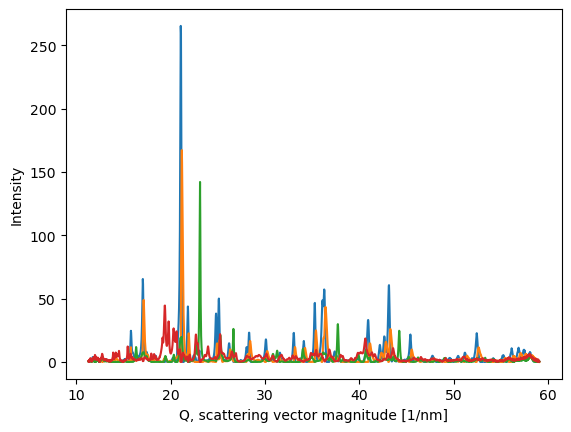

In [111]:
plt.plot(x,W)
plt.xlabel('Q, scattering vector magnitude [1/nm]')
plt.ylabel('Intensity')

A reconstruction of a real signal would then be as follows. Not quite as good as a rietfeld refinement per se (lol) but close enough for a quick shot at the problem

Text(0, 0.5, 'Intensity')

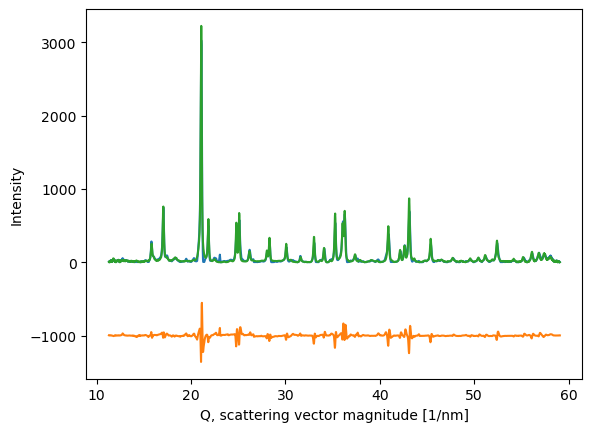

In [114]:
index = 23
H_ = H[:,23]

plt.plot(x,W[:,0]*H_[0]+W[:,1]*H_[1]+W[:,2]*H_[2]+W[:,3]*H_[3],label='reconstruction')
plt.plot(x,W[:,0]*H_[0]+W[:,1]*H_[1]+W[:,2]*H_[2]+W[:,3]*H_[3]-y[:,index]-1000,label='error')
plt.plot(x,y[:,index],label='data')

plt.xlabel('Q, scattering vector magnitude [1/nm]')
plt.ylabel('Intensity')

Let's discuss some problems of these techniques and possibile avenues to improve